In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
cricket_df = pd.read_csv('Cricket.csv', encoding='ISO-8859-1', header=0, sep=',')
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
# scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cricket_df_scaled = cricket_df[['Ave', 'SR']]

cricket_df_scaled = scaler.fit_transform(cricket_df_scaled)

In [5]:
cricket_df_scaled

array([[ 1.07229395,  0.70315153],
       [ 0.58772461, -0.0441395 ],
       [ 0.59622582,  0.1109969 ],
       [-1.04790945,  1.20709133],
       [-0.87618487, -0.03399986],
       [ 0.16946476, -0.51259058],
       [ 0.99238251, -0.64947564],
       [ 0.42450125, -0.56734461],
       [ 0.108256  , -0.8167796 ],
       [ 0.33268811,  0.02176813],
       [ 0.12695867,  0.70315153],
       [ 0.54181804, -0.42538973],
       [-0.44772356,  1.78910632],
       [ 2.17575185,  0.95258652],
       [-0.2725985 , -0.53489778],
       [ 2.5549061 ,  2.1247282 ],
       [-0.61604765,  0.1860302 ],
       [-0.20288853,  0.58958763],
       [ 0.11675721,  0.13938788],
       [ 0.52311536, -0.86747777],
       [-0.3355075 ,  0.84916225],
       [ 0.48400977, -1.64315977],
       [-0.16208269, -1.17369472],
       [ 0.14056062, -0.24287632],
       [-0.590544  ,  2.53842527],
       [ 2.62121559,  1.1857981 ],
       [-0.40691772,  0.4020044 ],
       [-2.5424233 ,  3.82311689],
       [-1.04110847,

In [6]:
# Heirarchical clusters

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_cricket = linkage(cricket_df_scaled, method='complete', metric='euclidean')

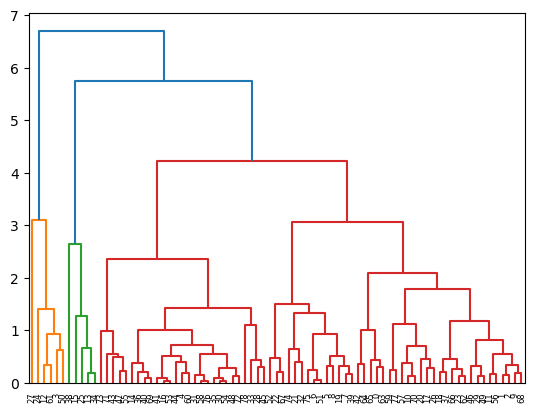

In [7]:
dendrogram(linkage_cricket)
plt.show()

In [8]:
# Let's cut the tree at 4

from scipy.cluster.hierarchy import cut_tree

In [9]:
cut_tree(linkage_cricket, n_clusters=4)

array([[0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [3],
       [2],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [3],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [3],
       [2],
       [2],
       [0],
       [3],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2]])

In [10]:
cluster_labels = cut_tree(linkage_cricket, n_clusters=4).reshape(-1, )

In [11]:
cricket_df['Cluster_labels'] = cluster_labels

In [12]:
print(cricket_df[['Player', 'Cluster_labels']].to_string())

                          Player  Cluster_labels
0           SR Tendulkar (INDIA)               0
1    KC Sangakkara (Asia/ICC/SL)               0
2           RT Ponting (AUS/ICC)               0
3        ST Jayasuriya (Asia/SL)               1
4     DPMD Jayawardene (Asia/SL)               2
5      Inzamam-ul-Haq (Asia/PAK)               0
6         JH Kallis (Afr/ICC/SA)               0
7        SC Ganguly (Asia/INDIA)               0
8      R Dravid (Asia/ICC/INDIA)               0
9               BC Lara (ICC/WI)               0
10               TM Dilshan (SL)               0
11    Mohammad Yousuf (Asia/PAK)               0
12        AC Gilchrist (AUS/ICC)               1
13         MS Dhoni (Asia/INDIA)               3
14          M Azharuddin (INDIA)               2
15       AB de Villiers (Afr/SA)               3
16              PA de Silva (SL)               2
17             CH Gayle (ICC/WI)               0
18             Saeed Anwar (PAK)               0
19            S Chan

In [13]:
A = [[2,1,1],[3,2,1],[2,1,2]]
print(np.linalg.inv(A))

[[ 3. -1. -1.]
 [-4.  2.  1.]
 [-1.  0.  1.]]
